# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(8, 8)

sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [8]:
# Observando os dados
athletes.head()

In [10]:
# Proporção de valores faltantes por variável
athletes.isna().sum()/athletes.shape[0]

id             0.000000
name           0.000000
nationality    0.000000
sex            0.000000
dob            0.000087
height         0.028601
weight         0.057116
sport          0.000000
gold           0.000000
silver         0.000000
bronze         0.000000
dtype: float64

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [19]:
def q1():
    height_sampled = get_sample(athletes, 'height', n=3000)
    result = sct.shapiro(height_sampled) # (The test statistic, the p-value)
    return(bool(result[1] > 0.05))

In [18]:
print('Resposta:', q1(), '\nRejeitamos a hipótese de que as alturas são normalmente distribuídas')

5.681722541339695e-07
Resposta: False 
Rejeitamos a hipótese de que as alturas são normalmente distribuídas


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

__Reflexão__:

- A forma do gráfico e o resultado do teste são condizentes, já que a curtose observada no histograma não se assemelha a de uma normal.
- Pelo qqplot podemos observar pequenos desvios nas caudas.
- Somente com nível de significãncia menor do que 5.681722541339695e-07

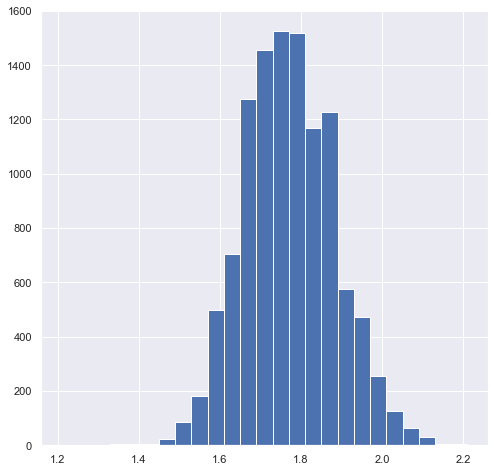

In [9]:
athletes.height.hist(bins=25)

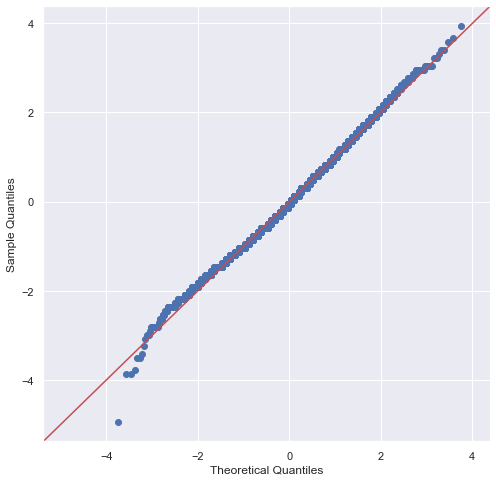

In [10]:
sm.qqplot(athletes.height.dropna(), fit=True, line="45");

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [22]:
def q2():
    height_sampled = get_sample(athletes, 'height', n=3000)
    result = sct.jarque_bera(height_sampled) # (The test statistic, the p-value)
    return(bool(result[1] > 0.05))

__Para refletir__:

* Esse resultado faz sentido?

In [26]:
print('Resposta:', q2(), '\nRejeitamos a hipótese de que as alturas são normalmente distribuídas.\nO Resultado faz sentido já que estamos testando a mesma hipótese.')

Resposta: False 
Rejeitamos a hipótese de que as alturas são normalmente distribuídas.
O Resultado faz sentido já que estamos testando a mesma hipótese.


## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [30]:
def q3():
    weight_sampled = get_sample(athletes, 'weight', n=3000)
    result = sct.normaltest(weight_sampled) # (The test statistic, the p-value)
    return(bool(result[1] > 0.05))

In [31]:
print('Resposta:', q3(), '\nRejeitamos a hipótese de que os pesos são normalmente distribuídos.')

Resposta: False 
Rejeitamos a hipótese de que os pesos são normalmente distribuídos.


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

__Reflexão__:

- A forma do gráfico e o resultado do teste são condizentes, já que a distribuição dos pesos apresenta assimetria positiva e outliers (vide histograma, boxplot e qqplot abaixo).

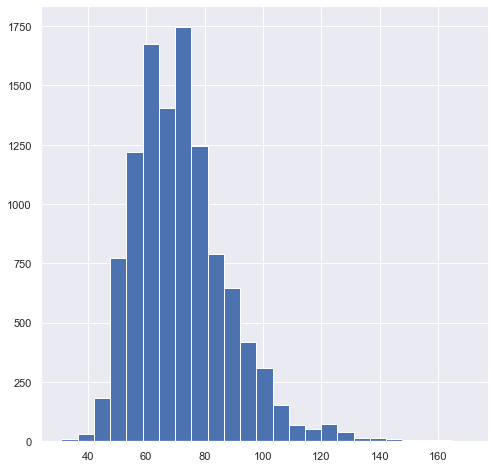

In [13]:
athletes.weight.hist(bins=25)

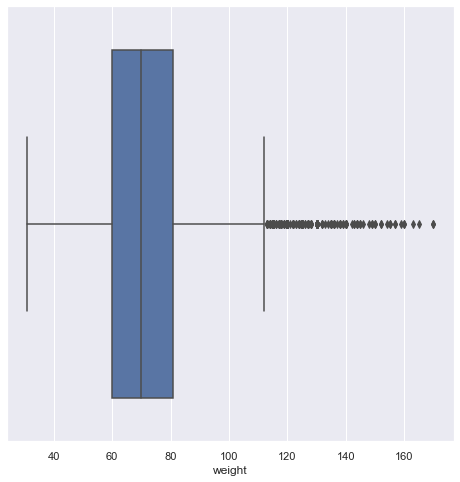

In [28]:
sns.boxplot(athletes.weight)

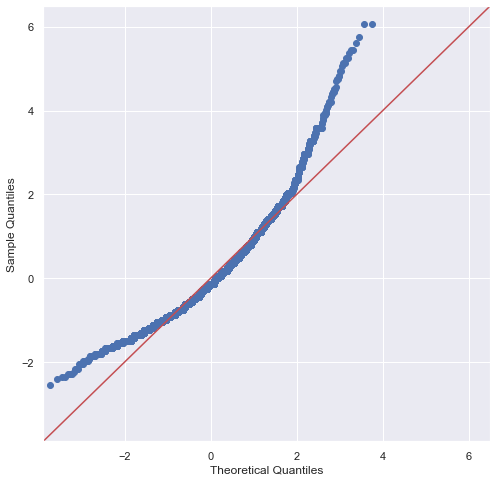

In [14]:
sm.qqplot(athletes.weight.dropna(), fit=True, line="45");

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [32]:
athletes['log_weight'] = np.log(athletes.weight)

def q4():
    weight_sampled = get_sample(athletes, 'log_weight', n=3000)
    result = sct.normaltest(weight_sampled) # (The test statistic, the p-value)
    return(bool(result[1] > 0.05))

In [33]:
print('Resposta:', q4(), '\nRejeitamos a hipótese de que os pesos são normalmente distribuídos.')

Resposta: False 
Rejeitamos a hipótese de que os pesos são normalmente distribuídos.


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

__Reflexão__:

- A forma do gráfico e o resultado do teste são condizentes. A distribuição observada no boxplot tem um comportamento mais afunilado do que a normal.
- Esperava que a distribuição fosse se aproximar de uma normal já que a aplicação do logaritmo é utilizada para tratar assimetria.

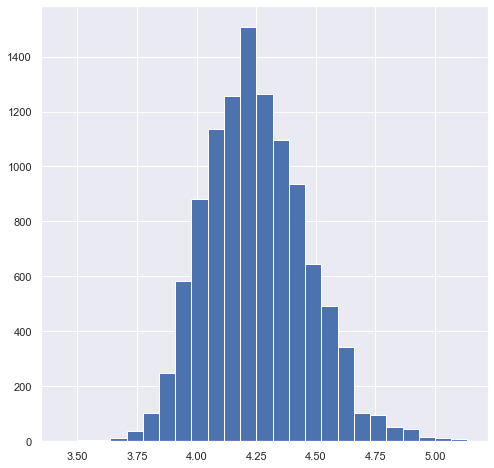

In [25]:
athletes.log_weight.hist(bins=25)

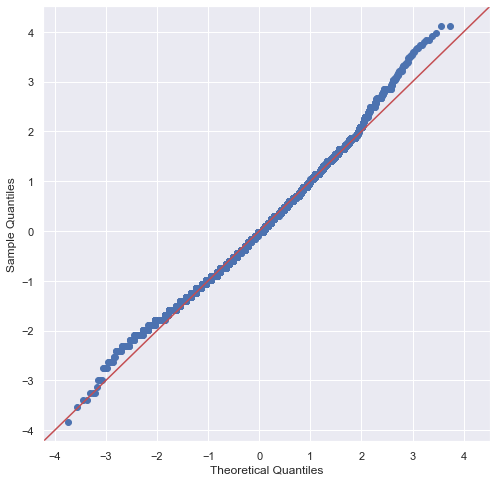

In [30]:
sm.qqplot(athletes.log_weight.dropna(), fit=True, line='45');

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [34]:
bra = athletes.query('nationality == "BRA"')
usa = athletes.query('nationality == "USA"')
can = athletes.query('nationality == "CAN"')

In [35]:
def q5(): 
    result = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit')
    return(bool(result[1] > 0.05))

In [37]:
print('Resposta:', q5(), '\nRejeitamos a hipótese de que as médias dos pesos dos atletas sejam iguais no Brasil e nos Estados Unidos.')

Resposta: False 
Rejeitamos a hipótese de que as médias dos pesos dos atletas sejam iguais no Brasil e nos Estados Unidos.


## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [38]:
def q6(): 
    result = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit')
    return(bool(result[1] > 0.05))

In [41]:
print('Resposta:', q6(), '\nNão rejeitamos a hipótese de que as médias dos pesos dos atletas sejam iguais no Brasil e no Canadá.')

Resposta: True 
Não rejeitamos a hipótese de que as médias dos pesos dos atletas sejam iguais no Brasil e no Canadá.


## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [43]:
def q7():
    result = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')
    pvalue = round(result[1],8)
    return(float(pvalue))

In [48]:
print('P-valor:', q7(), '\nCom nível de significância de 5%, rejeitamos a hipótese de igualdade entre as médias da altura dos atletas dos Estados Unidos e Canadá.')

P-valor: 0.00046601 
Com nível de significância de 5%, rejeitamos a hipótese de igualdade entre as médias da altura dos atletas dos Estados Unidos e Canadá.


__Para refletir__:

* O resultado faz sentido?

__Reflexão__:

* O resultado faz sentido. Observando a distribuição da altura dos atletas dos três países, constatamos a proxidade entre as curvas do Brasil e Canadá, e ainda a distância dos dois países em relação aos Estados Unidos.

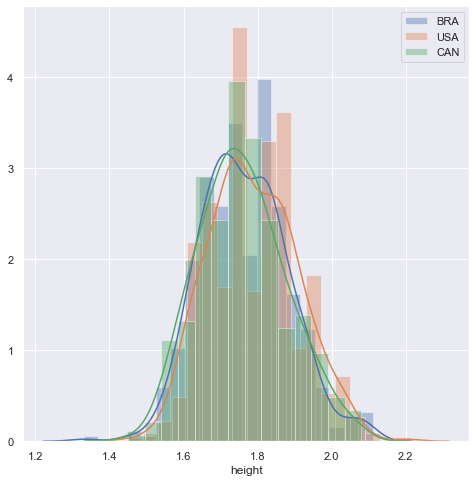

In [55]:
sns.distplot(bra.height.dropna(), label='BRA')
sns.distplot(usa.height.dropna(), label='USA')
sns.distplot(can.height.dropna(), label='CAN')
plt.legend()